# Data Balancing

## Setup

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import nbimporter
import FeatureSelection as fs

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Aux Functions

In [79]:
def balance_SMOTE(X, y):
    smote = SMOTE(sampling_strategy='minority', random_state=30)
    smote_X, smote_y = smote.fit_sample(X, y)
    return smote_X, smote_y

def balance_mix(X, y):
    smote = SMOTE(sampling_strategy='minority', random_state=30)
    tl = TomekLinks(sampling_strategy='all')
    smotetl = SMOTETomek(smote=smote, tomek=tl, random_state=30)
    smotetl_X, smotetl_y = smotetl.fit_resample(X, y)
    return smotetl_X, smotetl_y

def balance_undersample(X, y):
    rus = RandomUnderSampler(random_state=None) 
    X_rus, y_rus = rus.fit_resample(X, y)
    return X_rus, y_rus

def balance_oversample(X, y):
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_resample(X, y)
    return X_ros, y_ros

## Heart Failure Dataset

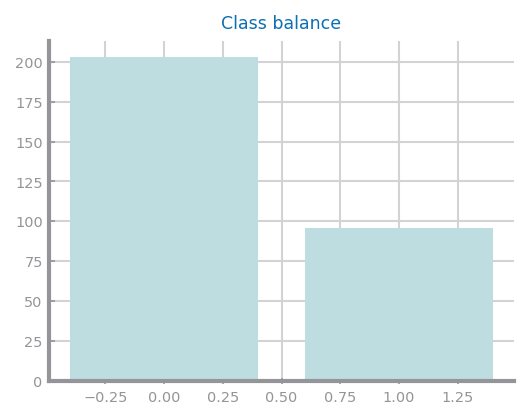

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


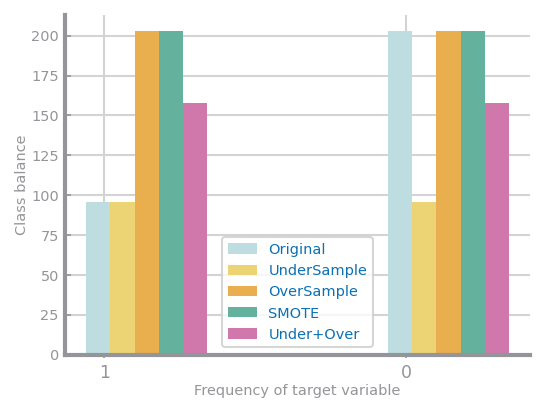

In [84]:
unbal = data1.copy()
target_count = unbal['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['DEATH_EVENT'] == min_class]
df_class_max = unbal[unbal['DEATH_EVENT'] != min_class]

y = unbal.pop('DEATH_EVENT').values
X = unbal.values

under_X, under_y = balance_undersample(X, y)
under_target_count = pd.Series(under_y).value_counts()
values['UnderSample'] = [under_target_count.values[ind_min_class], under_target_count.values[1-ind_min_class]]

over_X, over_y = balance_oversample(X, y)
over_target_count = pd.Series(over_y).value_counts()
values['OverSample'] = [over_target_count.values[ind_min_class], over_target_count.values[1-ind_min_class]]


smote_X, smote_y = balance_SMOTE(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

smotemix_X, smotemix_y = balance_mix(X, y)
smotemix_target_count = pd.Series(smotemix_y).value_counts()
values['Under+Over'] = [smotemix_target_count.values[ind_min_class], smotemix_target_count.values[1-ind_min_class]]


fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      xlabel='Frequency of target variable', ylabel='Class balance') # title='Target'
plt.show()

## Oral Toxicity Dataset

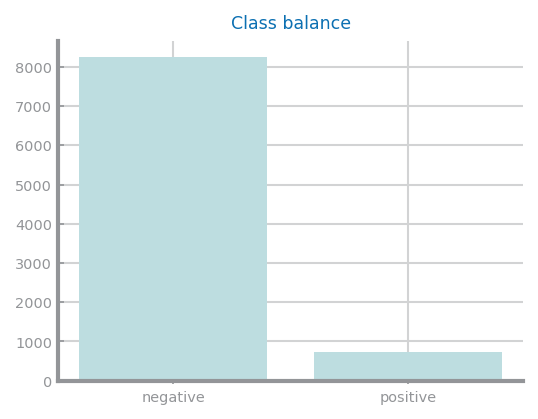

Minority class: 741
Majority class: 8250
Proportion: 0.09 : 1


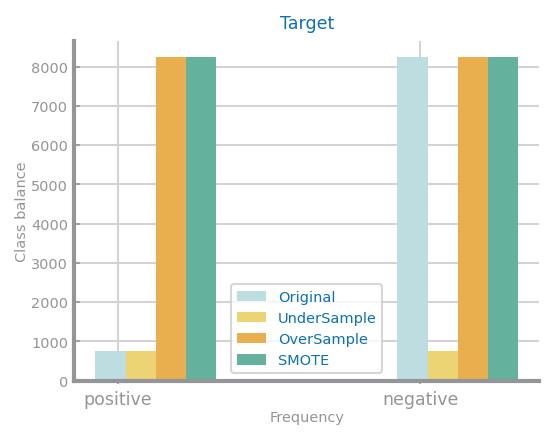

In [83]:
unbal = data2.copy()
target_count = unbal[unbal.columns[-1]].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal[unbal.columns[-1]] == min_class]
df_class_max = unbal[unbal[unbal.columns[-1]] != min_class]

y = unbal.pop(unbal.columns[-1]).values
X = unbal.values

under_X, under_y = balance_undersample(X, y)
under_target_count = pd.Series(under_y).value_counts()
values['UnderSample'] = [under_target_count.values[ind_min_class], under_target_count.values[1-ind_min_class]]

over_X, over_y = balance_oversample(X, y)
over_target_count = pd.Series(over_y).value_counts()
values['OverSample'] = [over_target_count.values[ind_min_class], over_target_count.values[1-ind_min_class]]

smote_X, smote_y = balance_SMOTE(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

#smotemix_X, smotemix_y = balance_mix(X, y)
#smotemix_target_count = pd.Series(smotemix_y).value_counts()
#values['SMOTEMIX'] = [smotemix_target_count.values[ind_min_class], smotemix_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='Frequency', ylabel='Class balance')
plt.show()

## Testing

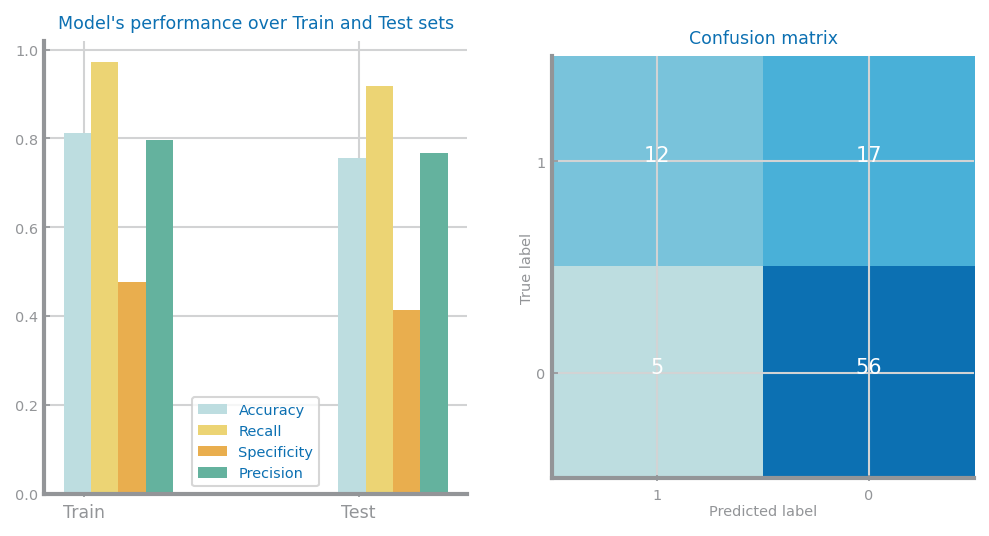

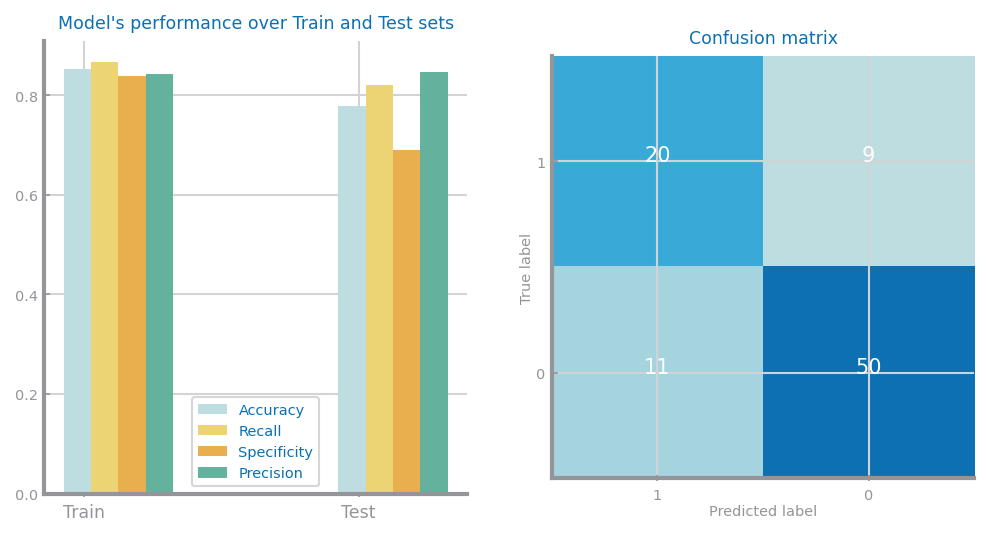

In [19]:
unbal = data1.copy()
y = unbal.pop('DEATH_EVENT').values
X = unbal.values

RANDOM_STATE = 40

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=RANDOM_STATE)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)


trnX, trnY = balance_SMOTE(trnX, trnY)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

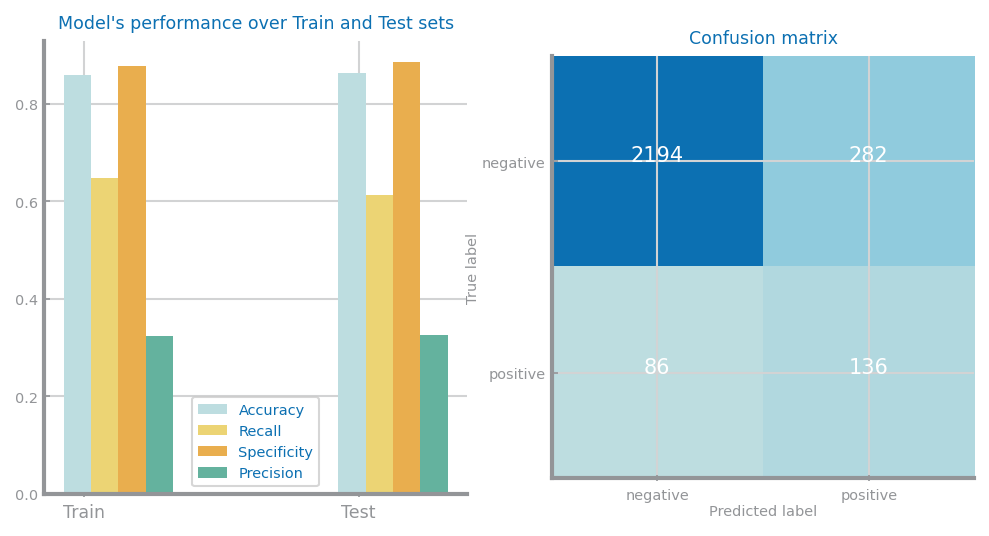

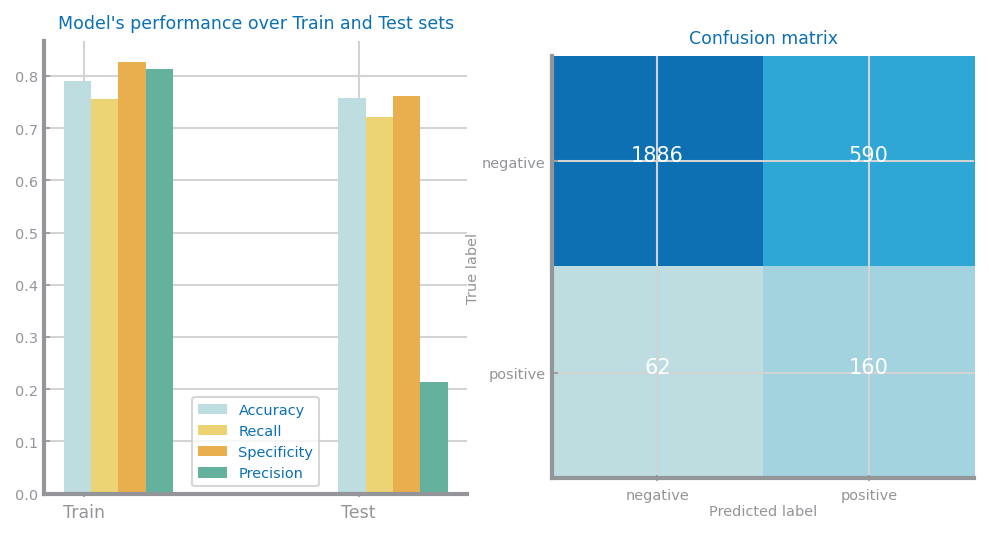

In [79]:
unbal = data2.copy()
y = unbal.pop(data2.columns[-1]).values
X = unbal.values

RANDOM_STATE = 42

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=RANDOM_STATE)

clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)


trnX, trnY = balance_undersample(trnX, trnY)

clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

## Alternative Idea

### Use bagging in a way that every sample has all the positive records and a random sample of the same number of negative records

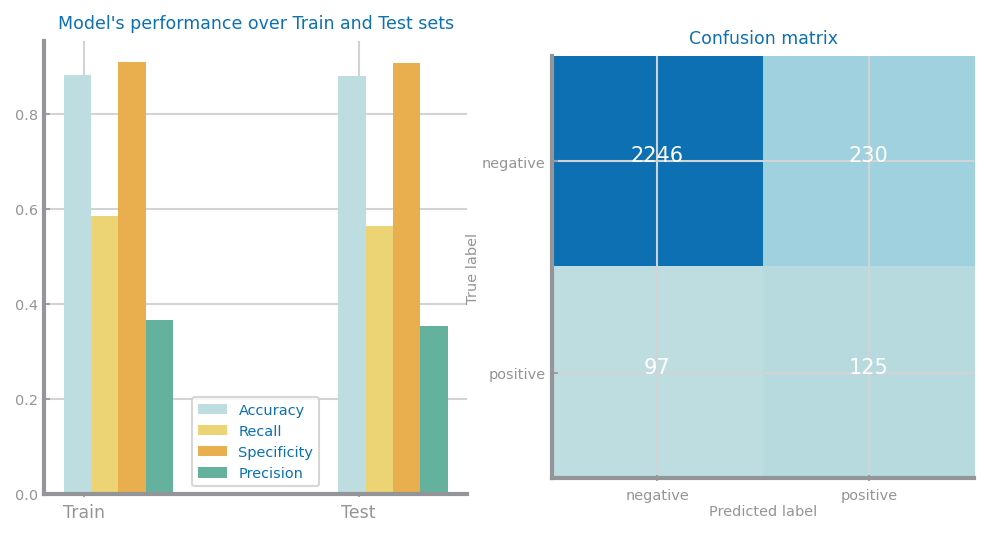

In [32]:
# Basic Bagging Classifier

unbal = data2.copy()

y = unbal.pop(unbal.columns[-1]).values
X = unbal.values

RANDOM_STATE = 0

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=RANDOM_STATE)

clf = BaggingClassifier(base_estimator=MultinomialNB(),
                        n_estimators=50, max_samples=0.2,
                        random_state=RANDOM_STATE)

clf.fit(trnX, trnY)

prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

# Naive Bayes

## Normal Undersampling

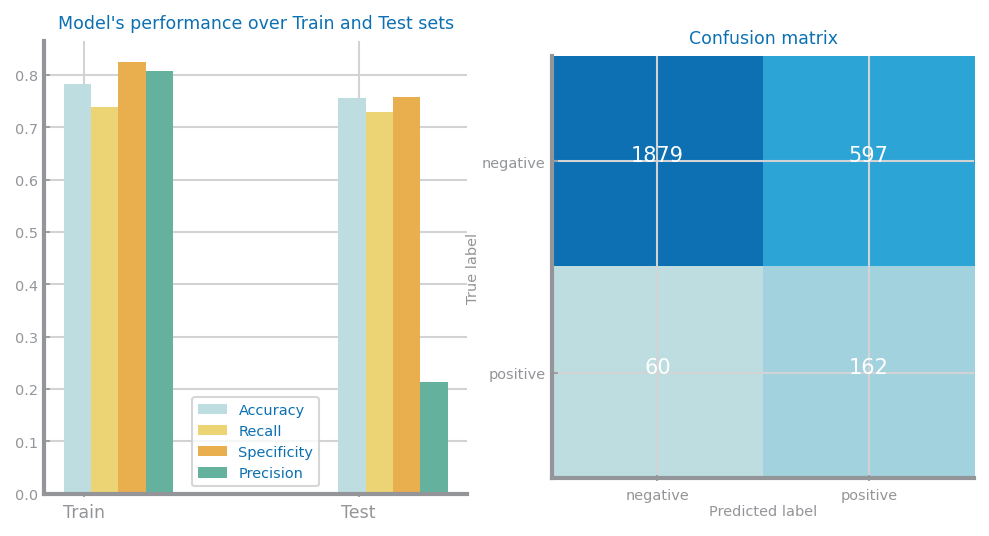

In [44]:
unbal = data2.copy()
y = unbal.pop(data2.columns[-1]).values
X = unbal.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=40)

RANDOM_STATE = 42

trnX, trnY = balance_undersample(trnX, trnY)

clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

## Bagging where every sample has all the positive records and a random sample of the same number of negative records

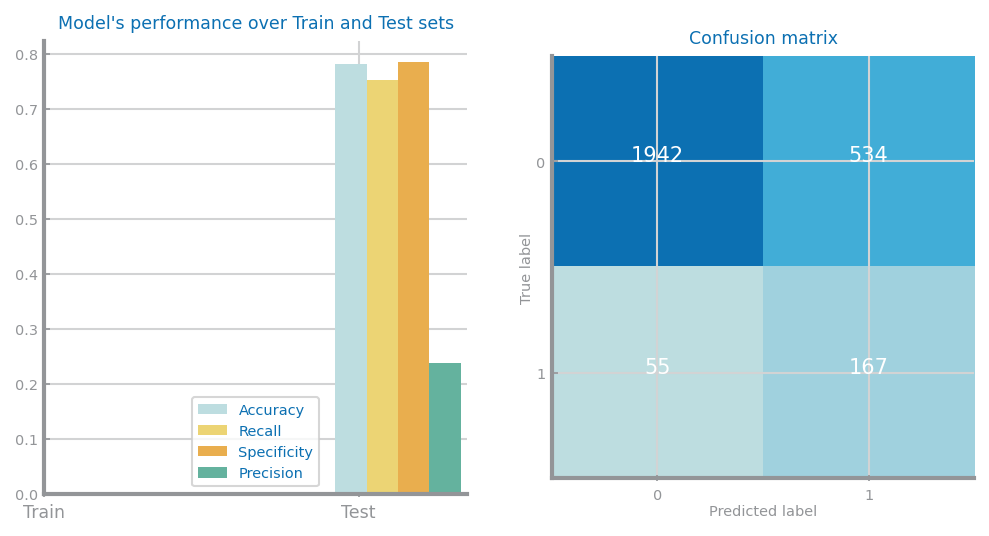

In [90]:
unbal = data2.copy()

# Cast target variable to binary
unbal[unbal.columns[-1]] = (unbal[unbal.columns[-1]] == 'positive').astype(int)

y = unbal.pop(unbal.columns[-1]).values
X = unbal.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

num_estimators = 5

prd_trn = []
prd_tst = []
for i in range(num_estimators):
    trnX_i, trnY_i = balance_undersample(trnX, trnY)
    
    clf = MultinomialNB()
    clf.fit(trnX_i, trnY_i)
    prd_trn.append(clf.predict(trnX_i))
    prd_tst.append(clf.predict(tstX))

    
    
# combinar as previsões destes modelos -> MAJORITY VOTE
maj_prd_tst = []
for i in range(len(prd_tst[0])):
    pos = 0
    neg = 0
    for j in range(len(prd_tst)):
        if prd_tst[j][i] == 1:
            pos += 1
        else:
            neg += 1
    
    if pos > neg:
        maj_prd_tst.append(1)
    else:
        maj_prd_tst.append(0)

ds.plot_evaluation_results(pd.unique(y), [], [], tstY, maj_prd_tst)


# Decision Trees

## Normal Undersampling

<Figure size 600x450 with 0 Axes>

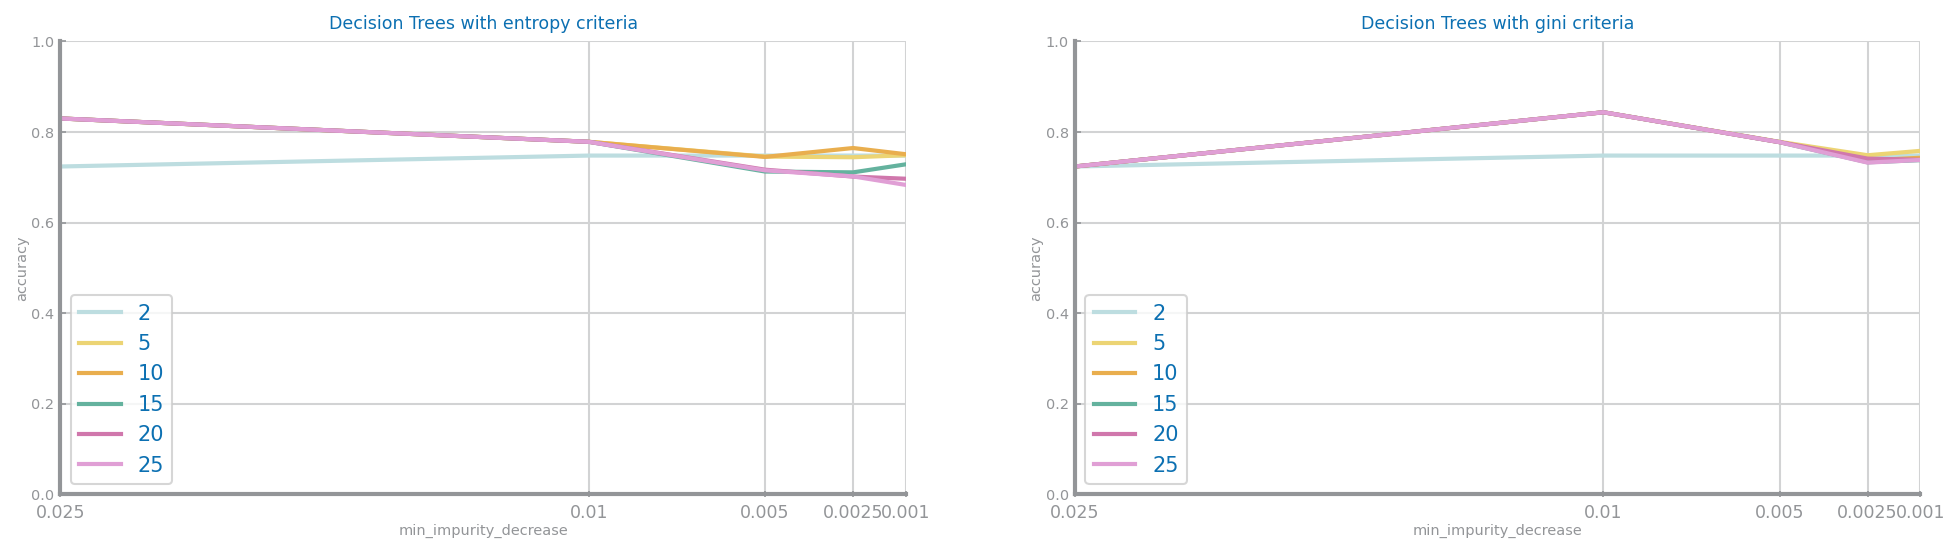

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.84


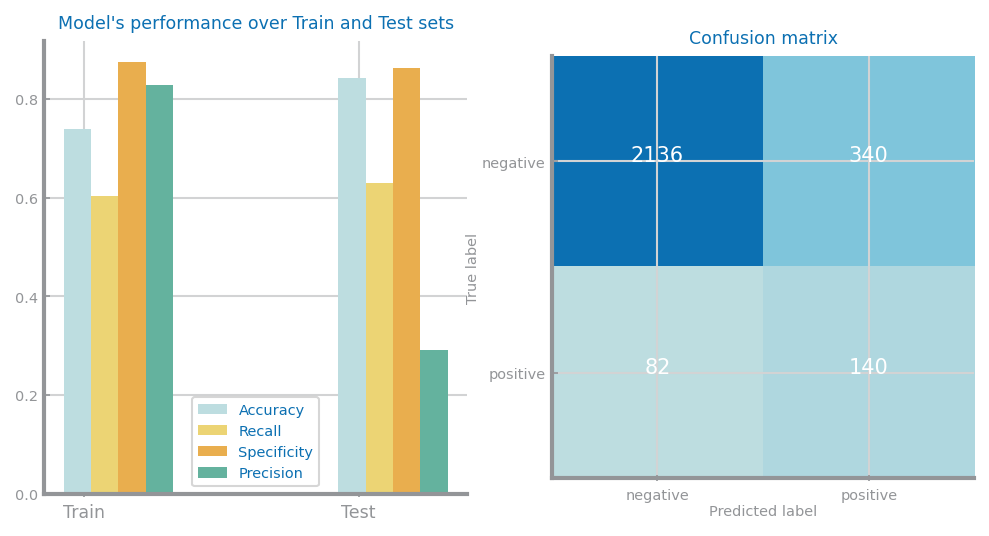

In [14]:
unbal = data2.copy()
y = unbal.pop(data2.columns[-1]).values
X = unbal.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=40)

trnX, trnY = balance_undersample(trnX, trnY)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

## Bagging where every sample has all the positive records and a random sample of the same number of negative records

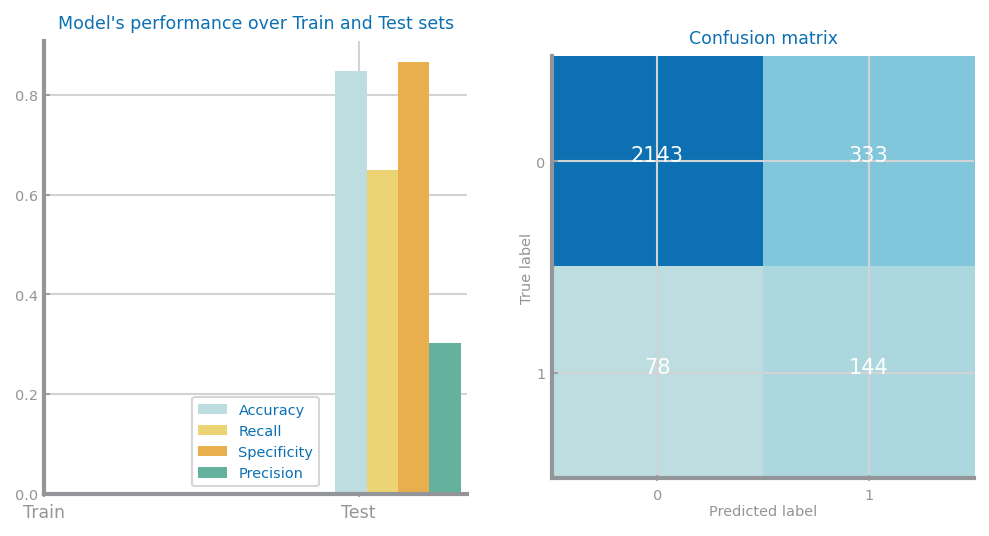

In [40]:
unbal = data2.copy()

# Cast target variable to binary
unbal[unbal.columns[-1]] = (unbal[unbal.columns[-1]] == 'positive').astype(int)

y = unbal.pop(unbal.columns[-1]).values
X = unbal.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=40)

num_estimators = 50

prd_trn = []
prd_tst = []
for i in range(num_estimators):
    trnX_i, trnY_i = balance_undersample(trnX, trnY)
    
    clf = DecisionTreeClassifier(min_samples_leaf=0.01, max_depth=5, criterion='gini', min_impurity_decrease=0.01)
    clf.fit(trnX_i, trnY_i)
    prd_trn.append(clf.predict(trnX_i))
    prd_tst.append(clf.predict(tstX))

    
    
# Combinar as previsões destes modelos -> MAJORITY VOTE
maj_prd_tst = []
for i in range(len(prd_tst[0])):
    pos = 0
    neg = 0
    for j in range(len(prd_tst)):
        if prd_tst[j][i] == 1:
            pos += 1
        else:
            neg += 1
    
    if pos > neg:
        maj_prd_tst.append(1)
    else:
        maj_prd_tst.append(0)

ds.plot_evaluation_results(pd.unique(y), [], [], tstY, maj_prd_tst)

<Figure size 600x450 with 0 Axes>

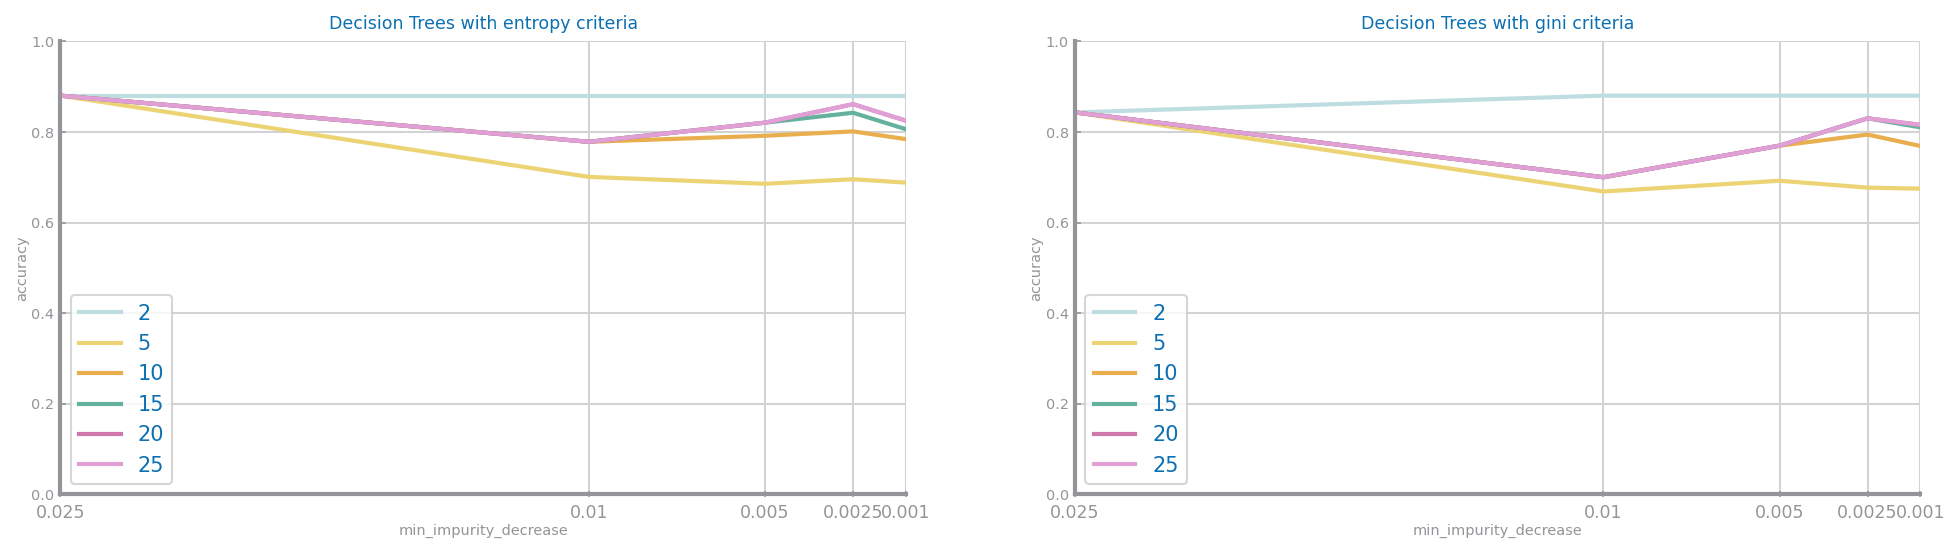

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.88


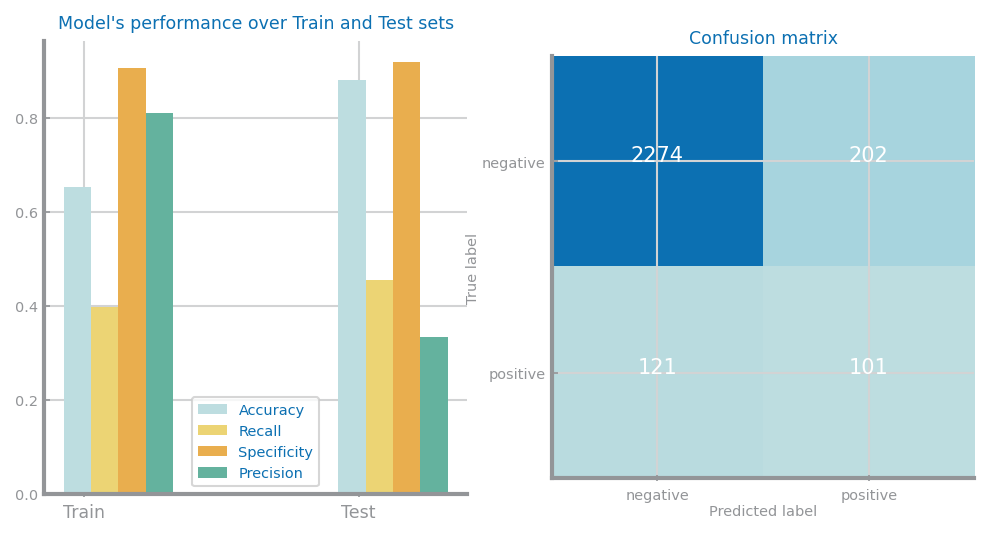

In [50]:
unbal = data2.copy()
y = unbal.pop(data2.columns[-1]).values
X = unbal.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=40)

trnX, trnY = balance_SMOTE(trnX, trnY)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)